In [1]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from gspread_formatting import *
from collections import Counter
import numpy as np
import time

import json
import urllib.request

import pandas as pd
import datetime as dt
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib import ticker
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import itertools as it

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('axes', axisbelow=True)
%matplotlib inline

In [2]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

creds = ServiceAccountCredentials.from_json_keyfile_name('../client_secret.json', scope)
client = gspread.authorize(creds)

usr_agent = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                  'Chrome/61.0.3163.100 Safari/537.36'}

In [3]:
today = time.strftime("%Y-%m-%d")

month_dict = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun',
              '07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}

weekday_mapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

alldates = pd.date_range(start='2020-01-06', end='2021-12-31').tolist()
datelist = [str(i.date()) for i in alldates]
weekdays = [weekday_mapping[i.date().weekday()] for i in alldates]
weeklist = [i//7 for i in range(len(alldates))]
DATE_DF = pd.DataFrame({'date':datelist,'day':weekdays,'week':weeklist})
DATERANGE = DATE_DF['date'].tolist()

date_dict = {DATERANGE[i]:i for i in range(len(DATERANGE))}

dates_tt = ['2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01',
            '2021-03-01','2021-04-01','2021-05-01']
dates_ll = ['Sep','Oct','Nov','Dec','2021','Feb','Mar','Apr','May']

In [535]:
all_state_names = {'ak': 'Alaska', 'al': 'Alabama', 'ar': 'Arkansas',
                   'as': 'American Samoa',  'az': 'Arizona',
                   'ca': 'California', 'co': 'Colorado',
                   'ct': 'Connecticut', 'dc': 'District of Columbia',
                   'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
                   'gu': 'Guam', 'hi': 'Hawaii', 'ia': 'Iowa',
                   'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana',
                   'ks': 'Kansas', 'ky': 'Kentucky', 'la': 'Louisiana',
                   'ma': 'Massachusetts', 'md': 'Maryland', 'me': 'Maine',
                   'mi': 'Michigan', 'mn': 'Minnesota', 'mo': 'Missouri',
                   'mp': 'Northern Mariana Islands', 'ms': 'Mississippi',
                   'mt': 'Montana', 'nc': 'North Carolina',
                   'nd': 'North Dakota', 'ne': 'Nebraska',
                   'nh': 'New Hampshire', 'nj': 'New Jersey',
                   'nm': 'New Mexico', 'nv': 'Nevada', 'ny': 'New York',
                   'oh': 'Ohio', 'ok': 'Oklahoma', 'or': 'Oregon',
                   'pa': 'Pennsylvania', 'pr': 'Puerto Rico',
                   'ri': 'Rhode Island', 'sc': 'South Carolina',
                   'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas',
                   'ut': 'Utah', 'va': 'Virginia',
                   'vi': 'Virgin Islands', 'vt': 'Vermont',
                   'wa': 'Washington', 'wi': 'Wisconsin',
                   'wv': 'West Virginia', 'wy': 'Wyoming'}

all_state_ids = {'01': 'al', '02': 'ak', '04': 'az', '05': 'ar',
                 '06': 'ca', '08': 'co', '09': 'ct', '10': 'de',
                 '11': 'dc', '12': 'fl', '13': 'ga', '15': 'hi',
                 '16': 'id', '17': 'il', '18': 'in', '19': 'ia',
                 '20': 'ks', '21': 'ky', '22': 'la', '23': 'me',
                 '24': 'md', '25': 'ma', '26': 'mi', '27': 'mn',
                 '28': 'ms', '29': 'mo', '30': 'mt', '31': 'ne',
                 '32': 'nv', '33': 'nh', '34': 'nj', '35': 'nm',
                 '36': 'ny', '37': 'nc', '38': 'nd', '39': 'oh',
                 '40': 'ok', '41': 'or', '42': 'pa', '44': 'ri',
                 '45': 'sc', '46': 'sd', '47': 'tn', '48': 'tx',
                 '49': 'ut', '50': 'vt', '51': 'va', '53': 'wa',
                 '54': 'wv', '55': 'wi', '56': 'wy', "60": 'as',
                 "66": 'gu', "72": 'pr', '78': 'vi', '69': 'mp'}

all_ids_state = {j:i for i,j in all_state_ids.items()}
all_names_state = {j:i for i,j in all_state_names.items()}

state_posx = {'ak': (0, 0), 'me': (0, 10),#'gu': (7, 0), 'vi': (7, 9), 'pr': (7, 8), 'mp': (7, 1),
              'vt': (1, 9), 'nh': (1, 10),'wa': (2, 0), 'id': (2, 1), 'mt': (2, 2), 'nd': (2, 3), 'mn': (2, 4),
              'il': (2, 5), 'wi': (2, 6), 'mi': (2, 7), 'ny': (2, 8), 'ri': (2, 9), 'ma': (2, 10),'or': (3, 0),
              'nv': (3, 1), 'wy': (3, 2), 'sd': (3, 3), 'ia': (3, 4), 'in': (3, 5), 'oh': (3, 6), 'pa': (3, 7),
              'nj': (3, 8), 'ct': (3, 9), 'ca': (4, 0), 'ut': (4, 1), 'co': (4, 2), 'ne': (4, 3), 'mo': (4, 4),
              'ky': (4, 5), 'wv': (4, 6), 'va': (4, 7), 'md': (4, 8), 'de': (4, 9), 'az': (5, 1), 'nm': (5, 2), 
              'ks': (5, 3), 'ar': (5, 4), 'tn': (5, 5), 'nc': (5, 6), 'sc': (5, 7), 'dc': (5, 8), 'ok': (6, 3),
              'la': (6, 4), 'ms': (6, 5), 'al': (6, 6), 'ga': (6, 7), 'hi': (6, 0), 'tx': (7, 3), 'fl': (7, 7)}

data_names = ['cases','deaths','testing','vaccines','hospitalization']
base_url = 'https://jhucoronavirus.azureedge.net/api/v1/timeseries/us/'
stlist = []

for st_abbrev in [i.upper() for i in all_state_names.keys()]:
    dn = data_names[0]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_cases = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["raw_positives"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7-day_avg'] for i in data_i.values()]})

    dn = data_names[1]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_deaths = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["raw_positives"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7-day_avg'] for i in data_i.values()]})

    dn = data_names[2]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_tests = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["raw_tests"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7-day_avg_positivity'] for i in data_i.values()]})

    dn = data_names[3]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())
    st_vaccines = pd.DataFrame(data_i)
    st_vaccines = st_vaccines.rename(columns={'doses_admin_daily':'new_vaccines','7_day_avg':'new_vaccines_7day_avg'})

    dn = data_names[4]
    tmp_url = base_url + "%s/%s.json"%(dn, st_abbrev)
    with urllib.request.urlopen(tmp_url) as url_i:
        data_i = json.loads(url_i.read().decode())[0]
    st_hosp = pd.DataFrame({'date':list(data_i.keys()),
                  'new_%s'%dn: [i["inpatient_beds_used_covid"] for i in data_i.values()],
                  'new_%s_7day_avg'%dn: [i['7_day_avg'] for i in data_i.values()]})

    st_df = st_cases.merge(st_deaths, how='left', on='date')
    st_df = st_df.merge(st_tests, how='left', on='date')
    st_df = st_df.merge(st_vaccines, how='left', on='date')
    st_df = st_df.merge(st_hosp, how='left', on='date')
    st_df['state'] = all_state_names[st_abbrev.lower()]
    stlist.append(st_df)

ll = pd.concat(stlist).reset_index().iloc[:,1:]
ll = ll.merge(DATE_DF[['date','week']], how='left', on='date')

jhu_url = 'https://jhucoronavirus.azureedge.net/jhucoronavirus/state_vaccination_rates.json'
with urllib.request.urlopen(jhu_url) as url_i:
    data_i = json.loads(url_i.read().decode())

pop_df = []
for i in range(len(data_i)):
    tmp = data_i[i]['data']
    tmp['state'] = data_i[i]['state']
    pop_df.append(tmp)

pop_df = pd.DataFrame(pop_df)
pop_df['population'] = (pop_df['raw_full_vac'] / pop_df['percent_full_vac']).astype(int)

ll = ll.merge(pop_df[['state','population']], how='left', on='state')

,date,new_cases,new_cases_7day_avg,new_deaths,new_deaths_7day_avg,new_testing,new_testing_7day_avg,new_vaccines,new_vaccines_7day_avg,new_hospitalization,new_hospitalization_7day_avg,state,week,population
0,2020-01-22,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,2,7370.0
1,2020-01-23,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,2,7370.0
2,2020-01-24,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,2,7370.0
3,2020-01-25,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,2,7370.0
4,2020-01-26,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Alaska,2,7370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26651,2021-05-07,96.0,67.714286,0.0,0.428571,2002.0,0.055562,4158.0,1638.428571,26.0,38.80,Wyoming,69,5810.0
26652,2021-05-08,0.0,66.857143,0.0,0.285714,0.0,0.055562,2223.0,2113.142857,26.0,27.25,Wyoming,69,5810.0
26653,2021-05-09,0.0,66.166667,0.0,0.333333,0.0,0.055562,204.0,1698.000000,NaN,NaN,Wyoming,69,5810.0
26654,2021-05-10,141.0,61.600000,0.0,0.400000,2199.0,0.062998,39.0,1989.400000,NaN,NaN,Wyoming,70,5810.0


In [135]:
tx_data = client.open("COVID-data_Texas")
tx_worksheets = [tt.title for tt in list(tx_data.worksheets()) if tt.title!='state' and tt.title!='school_info']

state_df = pd.DataFrame(tx_data.worksheet('state').get_all_records(default_blank=np.nan))
state_df = state_df.merge(DATE_DF[['date','week']], how='left', on='date')
school_info_df = pd.DataFrame(tx_data.worksheet('school_info').get_all_records(default_blank=np.nan))
school_info_df['fips'] = "48"+("00"+school_info_df['fips'].astype(str)).str[-3:]

In [44]:
district_dfs = [pd.DataFrame(tx_data.worksheet(i).get_all_records(default_blank=np.nan))
                for i in tx_worksheets[0:9]]
districts_df = pd.concat(district_dfs)
districts_df['district_name'] = districts_df['district_name'].str.replace('\n',' ')
districts_df = districts_df.sort_values(['district_name','date']).reset_index().iloc[:,1:]

for x in ['new_cases_student_EE-3', 'new_cases_student_4-6',
          'new_cases_student_7-12', 'new_staff_cases', 'new_infected_oncampus',
          'new_infected_offcampus', 'new_infected_unknown',
          'total_cases_student_EE-3', 'total_cases_student_4-6',
          'total_cases_student_7-12', 'total_staff_cases',
          'total_infected_oncampus', 'total_infected_offcampus',
          'total_infected_unknown']:
    districts_df.loc[districts_df[x]=='.',x]=np.nan
    districts_df.loc[districts_df[x]=='*',x]=np.nan
    
for x in ['district_enrollment_total','district_enrollment_est_oncampus']:
    districts_df.loc[districts_df[x]=='NR',x]=np.nan
    
districts_df['new_cases_student'] = districts_df[['new_cases_student_EE-3',
                                                  'new_cases_student_4-6',
                                                  'new_cases_student_7-12']].sum(axis=1)

In [45]:
campus_dfs = [pd.DataFrame(tx_data.worksheet(i).get_all_records(default_blank=np.nan))
              for i in tx_worksheets[9:]]

In [48]:
# tx_data = client.open("COVID-data_Texas2")
# tx_worksheets = [tt.title for tt in list(tx_data.worksheets()) if tt.title!='state']
# campus_dfs = campus_dfs + [pd.DataFrame(tx_data.worksheet(i).get_all_records(default_blank=np.nan))
#               for i in tx_worksheets]

campus_df = pd.concat(campus_dfs)
campus_df['district_name'] = campus_df['district_name'].str.replace('\n',' ')
campus_df['campus_name'] = campus_df['campus_name'].str.replace('\n',' ')
campus_df = campus_df.loc[~campus_df['campus_name'].isna()].copy()

campus_df = campus_df.sort_values(['district_name','campus_name',
                                   'date']).reset_index().iloc[:,1:]

for x in ['new_cases_student', 'new_staff_cases', 'new_infected_oncampus',
         'new_infected_offcampus', 'new_infected_unknown', 'total_cases_student',
         'total_staff_cases', 'total_infected_oncampus',
         'total_infected_offcampus', 'total_infected_unknown']:
    campus_df.loc[campus_df[x]=='.',x]=np.nan
    campus_df.loc[campus_df[x]=='*',x]=np.nan
    
for x in ['district_enrollment_total','district_enrollment_est_oncampus',
          'campus_enrollment_total','campus_enrollment_est_oncampus']:#,
    campus_df.loc[campus_df[x]=='NR',x]=np.nan

campus_df_g = campus_df.groupby('date').agg(
                        {'district_enrollment_total':np.nansum,
                         'district_enrollment_est_oncampus':np.nansum,
                         'campus_enrollment_total':np.nansum,
                         'campus_enrollment_est_oncampus':np.nansum,
                         'new_cases_student':np.nansum, 'new_staff_cases':np.nansum,
                         'new_infected_oncampus':np.nansum, 'new_infected_offcampus':np.nansum,
                         'new_infected_unknown':np.nansum}).reset_index()

In [95]:
tx_out = []
for dl in np.unique(campus_df['district_lea'].unique().tolist()+district_df['district_lea'].unique().tolist()):
    dlf = campus_df.loc[campus_df.district_lea==dl].groupby(['date','district_lea']
                                                            ).agg({'campus_enrollment_total':'sum',
                                                                   'campus_enrollment_est_oncampus':'sum',
                                                                   'total_cases_student':'sum',
                                                                   'total_staff_cases':'sum',
                                                                   'total_infected_oncampus':'sum',
                                                                   'total_infected_offcampus':'sum',
                                                                   'total_infected_unknown':'sum'}).reset_index()
    dlf1 = district_df1.loc[district_df1.district_lea==dl].copy()
    dlf1 = dlf1.rename(columns={'district_enrollment':'district_enrollment_total',
                                'district_enrollment_est':'district_enrollment_est_oncampus'})
    dlf1 = dlf1[['date', 'district_lea', 'district_enrollment_total',
                   'district_enrollment_est_oncampus', 'new_cases_student',
                   'new_staff_cases', 'new_infected_oncampus',
                   'new_infected_offcampus', 'new_infected_unknown']].copy()

    dlf = dlf.rename(columns={'campus_enrollment_total':'district_enrollment_total',
                              'campus_enrollment_est_oncampus':'district_enrollment_est_oncampus'})
    gbcols = ['new_cases_student', 'new_staff_cases', 'new_infected_oncampus',
              'new_infected_offcampus', 'new_infected_unknown']
    for x in gbcols:
        dlf1[x.replace('new','total')] = np.cumsum(np.nan_to_num(dlf1[x].astype(float).values))

    dlf1 = dlf1[dlf.columns]

    dlf = pd.concat([dlf1,dlf]).reset_index().iloc[:,1:]

    for x in ['cases_student', 'staff_cases', 'infected_oncampus', 'infected_offcampus', 'infected_unknown']:
        vals = np.array([dlf["total_"+x].values[0]]+list(np.diff(dlf["total_"+x])))
        vals[vals<0] = 0        
        dlf["new_"+x] = vals
    
    tx_out.append(dlf)

In [165]:
tx_df = pd.concat(tx_out).reset_index().iloc[:,1:]

In [166]:
tx_dfg = tx_df.groupby('date').agg({i:'sum' for i in gbcols}).reset_index()

In [167]:
tx_df = tx_df.merge(school_info_df[['district_lea','fips']].drop_duplicates(), how='left', on='district_lea')

In [208]:
cou_df = tx_df.groupby(['date', 'fips']).agg({i:'sum' for i in gbcols+['district_enrollment_total',
                                                         'district_enrollment_est_oncampus']}).reset_index()
cou_df = cou_df.merge(DATE_DF[['date','week']],how='left', on='date')

In [267]:
jhu_cases_fn = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
jhu_deaths_fn = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

jhu_cases = pd.read_csv(jhu_cases_fn)
jhu_cases = jhu_cases.loc[~jhu_cases['FIPS'].isna()].copy()
jhu_cases['FIPS'] = jhu_cases['FIPS'].astype(int)
jhu_cases['FIPS'] = jhu_cases['FIPS'].astype(str)
jhu_cases = jhu_cases.loc[jhu_cases['FIPS'].str.len()>3].copy()
jhu_cases['FIPS'] = ("0"+jhu_cases['FIPS'].str[:]).str[-5:]
jhu_cases = jhu_cases.rename(columns={'FIPS':'fips','Province_State':'state',
                                      'Combined_Key':'name'})
date_cols = list(jhu_cases.columns[11:])
name_cols = ['fips','state','name']
jhu_cases = jhu_cases[name_cols+date_cols]

jhu_cases = jhu_cases.melt(id_vars=name_cols, value_vars=date_cols,
                           var_name='date', value_name='cases')
jhu_cases['date'] = pd.to_datetime(jhu_cases['date']).astype(str)
jhu_cases = jhu_cases.sort_values(['fips','date']).reset_index().iloc[:,1:]

jhu_cases.sort_values(['fips', 'date'], inplace=True)

# jhu_cases['cases'] = jhu_cases.groupby(['fips'])['cases'].transform(lambda x: x.rolling(window=7).mean())
jhu_cases = jhu_cases.loc[jhu_cases['date']>='2020-01-27'].copy()
jhu_cases = jhu_cases.merge(DATE_DF[['date','week']],how='left',on='date')
# jhu_cases = jhu_cases.groupby(['fips','state','name','week']).agg({'cases':'max','date':'min'}).reset_index()
jhu_cases['new_cases'] = jhu_cases.groupby(['fips'])['cases'].transform(lambda x: x.diff()) 
jhu_cases.sort_index(inplace=True)

In [289]:
# tmp = jhu_cases['new_cases'].values
# tmp[tmp<0] = 0
# jhu_cases['new_cases'] = tmp
county_pop = pd.read_csv('../../campus-covid-data/data/campus_covid_census.csv',dtype={'fips':'str'})
jhu_cases = jhu_cases.merge(county_pop[['fips','total_pop']],how='left',on='fips')
jhu_tx = jhu_cases.loc[(jhu_cases['fips'].isin(tx_df['fips'].unique()))].copy()

In [209]:
df_tx = jhu_tx.merge(cou_df[[i for i in cou_df.columns if i != 'week']],how='left', on=['fips','date'])

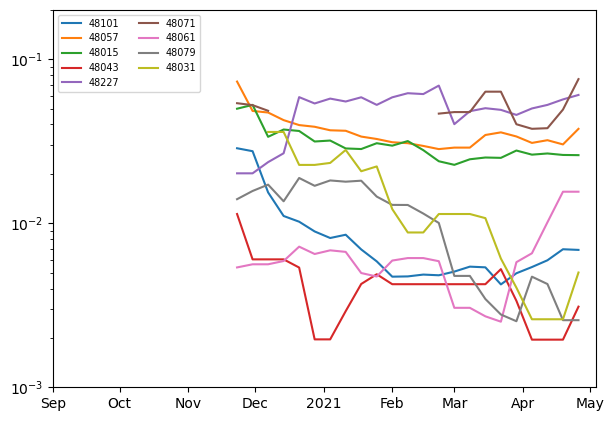

In [260]:
fig,ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
for fi in df_tx[['fips',
        'district_enrollment_total']].drop_duplicates().sort_values('district_enrollment_total',
                                                            ascending=False).dropna()['fips'].unique()[0:9]:
    df_tx_i = cou_df.loc[cou_df['fips']==fi].copy()
    df_tx_i = df_tx_i.loc[df_tx_i['date']>'2020-09-20'].copy()
    df_tx_i['new_cases_school'] = df_tx_i[['new_cases_student','new_staff_cases']].sum(axis=1)
    df_tx_i['frac_infection_oncampus'] = df_tx_i['new_infected_oncampus']/df_tx_i['new_cases_school']

    ax.plot([date_dict[i] for i in df_tx_i['date']],
            df_tx_i['frac_infection_oncampus'].rolling(window=10).mean(),label=df_tx_i['fips'].unique()[0])

ax.legend(fontsize='x-small',ncol=2,loc=2)
ax.set_ylim(0.001,0.2)
ax.set_yscale('log')
ax.set_xticks([date_dict[i] for i in dates_tt])
ax.set_xticklabels(dates_ll)

plt.show()

In [264]:
def get_ci(df, col, gb_col='date', percentile='95'):
    if percentile == '999':
        cival = 3.291
    if percentile == '995':
        cival = 2.807
    if percentile == '99':
        cival = 2.576
    if percentile == '95':
        cival = 1.96
    if percentile == '90':
        cival = 1.645
    if percentile == '80':
        cival = 1.282

    df_stats = df.groupby(gb_col)[col].agg([np.nanmean,'count',np.nanstd])
    ci95_hi = []
    ci95_lo = []
    for i in df_stats.index:
        m, c, s = df_stats.loc[i]
        ci95_hi.append(m + cival*s/np.sqrt(c))
        ci95_lo.append(m - cival*s/np.sqrt(c))
    df_stats['ci95_hi'] = ci95_hi
    df_stats['ci95_lo'] = ci95_lo

    return df_stats.reset_index()


In [306]:
tmp_out = []
# for fi in jhu_tx['fips'].unique()[-7:]:
for fi in jhu_tx['fips'].unique():
    df_tx_i = jhu_tx.loc[jhu_tx['fips']==fi].copy()
    min_cases = np.round(df_tx_i['total_pop'].unique()[0]/30000)
    df_tx_i.loc[df_tx_i['new_cases']<=min_cases, 'new_cases'] = np.nan

    out_df_tx_i = []

    window_len = 49 # days
    df_tx_i_dates = df_tx_i['date'].values

    for di, d_finish in enumerate(df_tx_i_dates[window_len:]):
        di += window_len
        d_start = df_tx_i_dates[di-window_len]
        df_tx_i_di = df_tx_i.loc[(df_tx_i['date']>=d_start)&(df_tx_i['date']<d_finish)].copy()

        df_tx_i_di['date_di'] = d_start
        df_tx_i_di = df_tx_i_di.merge(get_ci(df_tx_i_di, 'new_cases', 'name', '999'), how='left', on='name')

        df_tx_i_di['new_cases_adj'] = [i if i > df_tx_i_di['ci95_lo'].values[ix] and 
                                            i < df_tx_i_di['ci95_hi'].values[ix] else np.nan
                                       for ix, i in enumerate(df_tx_i_di['new_cases'].values)]
        out_df_tx_i.append(df_tx_i_di)

    tmp_df_tx_i = pd.concat(out_df_tx_i).reset_index().iloc[:,1:]
    tmp_df_tx_i = tmp_df_tx_i.groupby(['fips','state','name','date']).agg({'new_cases_adj':np.nanmean}).reset_index()
    tmp_df_tx_i = tmp_df_tx_i.merge(df_tx_i[['date','new_cases']], how='left', on='date')
    tmp_out.append(tmp_df_tx_i)

In [307]:
tmp_df = pd.concat(tmp_out).reset_index().iloc[:,1:]

In [316]:
df_tx = tmp_df.merge(cou_df[[i for i in cou_df.columns if i != 'week']],how='left', on=['fips','date'])
df_tx = df_tx.merge(DATE_DF[['date','week']],how='left', on='date')

In [330]:
df_txg = df_tx.groupby(['fips', 'state', 'name','week']).agg({'new_cases_adj':np.nanmean,
                                                     'new_cases_student':np.nanmean,
                                                     'new_staff_cases':np.nanmean,
                                                     'new_infected_oncampus':np.nanmean,
                                                     'new_infected_offcampus':np.nanmean,
                                                     'new_infected_unknown':np.nanmean,
                                                     'district_enrollment_total':np.nanmean,
                                                     'district_enrollment_est_oncampus':np.nanmean,
                                                     'date':'min'}).reset_index()
df_txg['new_cases'] = df_txg['new_cases_adj'] * 7
df_txg = df_txg.merge(county_pop[['fips','total_pop']], how='left', on='fips')

In [553]:
df_txg['frac_enrollment_oncampus'] = df_txg['district_enrollment_est_oncampus']/df_txg['district_enrollment_total']

In [558]:
df_txg['new_cases_school'] = df_txg[['new_cases_student','new_staff_cases']].sum(axis=1)
df_txg['new_cases_school_x'] = df_txg[['new_infected_oncampus','new_infected_offcampus','new_infected_unknown']].sum(axis=1)
df_txg['frac_infection_oncampus'] = df_txg['new_infected_oncampus']/df_txg['new_cases_school_x']
df_txg['frac_infection_offcampus'] = df_txg['new_infected_offcampus']/df_txg['new_cases_school_x']
df_txg['frac_infection_unknown'] = df_txg['new_infected_unknown']/df_txg['new_cases_school_x']

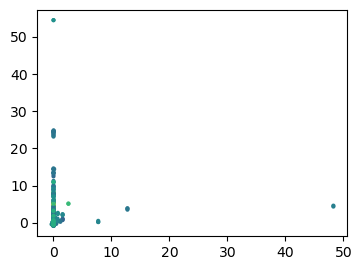

In [605]:
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=100)
for fi in df_txg['fips'].unique():
    dfi = df_txg.loc[df_txg['fips']==fi].copy()
    if dfi.total_pop.mean()>10000:
        ax.scatter(dfi['frac_enrollment_oncampus'].pct_change().rolling(window=wid).mean(),
                   dfi['new_cases_school'].pct_change().rolling(window=wid).mean(),lw=0,marker='.',
                   c=[np.log(dfi.total_pop.mean())]*dfi.shape[0],
                   vmin=np.log(df_txg['total_pop'].min()),vmax=np.log(df_txg['total_pop'].max()))
        
# ax.set_xlim(1e-5,1e3)
# ax.set_ylim(1e-4,1e2)
# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()

In [389]:
tt = df_txg.loc[df_txg['total_pop']>10000].copy()

In [548]:
tx_dfg['new_cases_school'] = tx_dfg[['new_cases_student','new_staff_cases']].sum(axis=1)
tx_dfg['tmpx'] = tx_dfg[['new_infected_oncampus','new_infected_offcampus','new_infected_unknown']].sum(axis=1)
tx_dfg['new_cases_school_x'] = tx_dfg[['new_infected_oncampus','new_infected_offcampus','new_infected_unknown']].sum(axis=1)
tx_dfg['frac_infection_oncampus'] = tx_dfg['new_infected_oncampus']/tx_dfg['new_cases_school_x']
tx_dfg['frac_infection_offcampus'] = tx_dfg['new_infected_offcampus']/tx_dfg['new_cases_school_x']
tx_dfg['frac_infection_unknown'] = tx_dfg['new_infected_unknown']/tx_dfg['new_cases_school_x']
# tx_dfg['frac_infection_oncampus'] = tx_dfg['new_infected_oncampus']/tx_dfg['new_cases_school']
# tx_dfg['frac_infection_offcampus'] = tx_dfg['new_infected_offcampus']/tx_dfg['new_cases_school']
# tx_dfg['frac_infection_unknown'] = tx_dfg['new_infected_unknown']/tx_dfg['new_cases_school']

In [541]:
ll_tx = ll.loc[(ll['state']=='Texas')&(ll['date']>='2020-01-27')].copy()
ll_tx_dfg = ll_tx.groupby('week').agg({'date':'min','new_cases_7day_avg':'mean'}).reset_index()
ll_tx_dfg['new_cases_state'] = ll_tx_dfg['new_cases_7day_avg']*7

In [544]:
tx_dfg = tx_dfg.merge(ll_tx_dfg[['date','new_cases_state']], how='left', on='date')

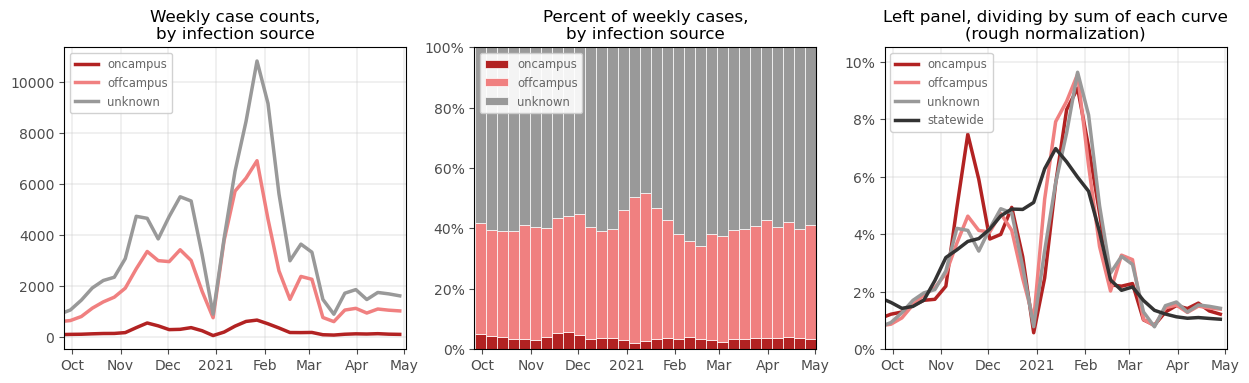

In [549]:
wid = 3
fig, ax = plt.subplots(1,3,figsize=(15,4),dpi=100,sharex=True)

labs_tx = ['on-campus infection','off-campus infection',
           'unknown infection','statewide case counts']
cols = ['firebrick','lightcoral','.6','.2']

bvals = np.zeros(tx_dfg.shape[0])
for fi, f in enumerate(['new_infected_oncampus','new_infected_offcampus','new_infected_unknown']):
    yvals = tx_dfg[f].rolling(window=wid-1).mean().values
    ax[0].plot([date_dict[i]+2 for i in tx_dfg['date']], yvals, lw=2.5,
               label=f.split('_')[-1], color=cols[fi])

for fi, f in enumerate(['frac_infection_oncampus','frac_infection_offcampus','frac_infection_unknown']):
    yvals = tx_dfg[f].rolling(window=wid).mean().values
    ax[1].bar([date_dict[i]+2 for i in tx_dfg['date']], yvals, bottom=bvals, width=7, ec='w', lw=0.5,
               label=f.split('_')[-1], color=cols[fi])
    bvals = bvals+np.nan_to_num(yvals)

for fi, f in enumerate(['new_infected_oncampus','new_infected_offcampus','new_infected_unknown']):
    yvals = tx_dfg[f].rolling(window=wid-1).mean().values
    ax[2].plot([date_dict[i]+2 for i in tx_dfg['date']], yvals/np.nansum(yvals), lw=2.5,
               label=f.split('_')[-1], color=cols[fi])

yvals = tx_dfg['new_cases_state'].rolling(window=wid-1).mean().values
ax[2].plot([date_dict[i]+2 for i in tx_dfg['date']], yvals/np.nansum(yvals), lw=2.5,
           label='statewide', color=cols[-1])

ax[1].set_ylim(0, 1)
ax[1].set_yticks(np.linspace(0,1,6))
ax[1].set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax[2].set_ylim(0, 0.105)
ax[2].set_yticks(np.linspace(0,.1,6))
ax[2].set_yticklabels(['0%','2%','4%','6%','8%','10%'])

ax[0].set_title('Weekly case counts,\nby infection source')
ax[1].set_title('Percent of weekly cases,\nby infection source')
ax[2].set_title('Left panel, dividing by sum of each curve\n(rough normalization)')

for a in fig.axes:
    l = a.legend(loc=2,fontsize='small',framealpha=0.9)
    for text in l.get_texts():
        text.set_color('.4')
    a.set_xticks([date_dict[i] for i in dates_tt])
    a.set_xticklabels(dates_ll)
    a.set_xlim(date_dict['2020-09-26'],date_dict[today]-10)
    a.tick_params(labelcolor='.3', color='.3')
    a.grid(linewidth=1.25,color='.75',alpha=0.25)

plt.show()

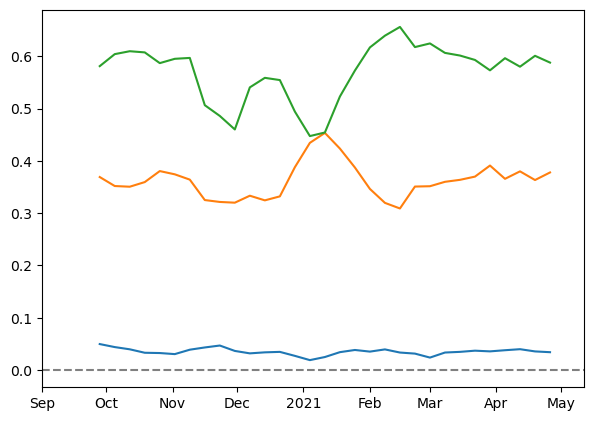

In [475]:
wid = 3
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.plot([date_dict[i] for i in tx_dfg['date']],tx_dfg['frac_infection_oncampus'].rolling(window=wid).mean())
ax.plot([date_dict[i] for i in tx_dfg['date']],tx_dfg['frac_infection_offcampus'].rolling(window=wid).mean())
ax.plot([date_dict[i] for i in tx_dfg['date']],tx_dfg['frac_infection_unknown'].rolling(window=wid).mean())

ax.set_xticks([date_dict[i] for i in dates_tt])
ax.set_xticklabels(dates_ll)
ax.hlines(0, date_dict['2020-09-01'],date_dict[today],color='.5',ls='--')
# ax.set_ylim(0, 0.1)
ax.set_xlim(date_dict['2020-09-01'],date_dict[today])

plt.show()

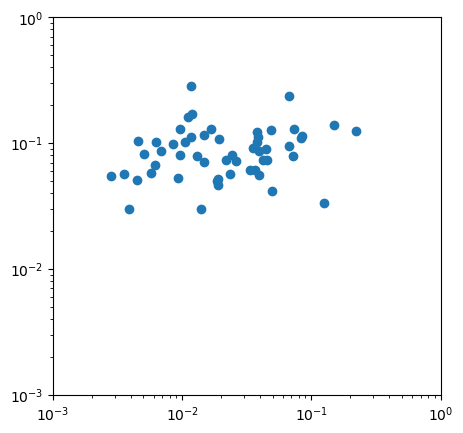

In [453]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=100)
ax.scatter(list(outf.values()),list(outv.values()))
ax.set_xscale('log')
ax.set_xlim(1e-3,1e0)
ax.set_yscale('log')
ax.set_ylim(1e-3,1e0)

plt.show()

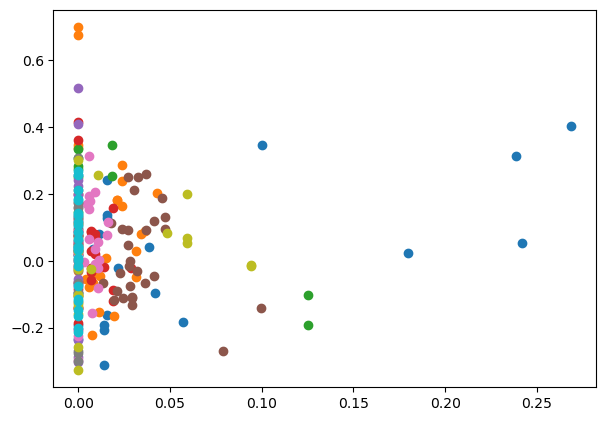

In [416]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

for fi in tt['fips'].unique()[:10]:
    df_txg_i = tt.loc[tt['fips']==fi].copy()
    df_txg_i['new_cases'] = df_txg_i[['new_cases']].ffill().add(df_txg_i[['new_cases']].bfill()).div(2)['new_cases']
    df_txg_i['new_cases_school'] = df_txg_i[['new_cases_student','new_staff_cases']].sum(axis=1)
    df_txg_i['new_cases_school'] = df_txg_i['new_cases_school'].rolling(window=2).mean()
    df_txg_i['frac_infection_oncampus'] = df_txg_i['new_infected_oncampus']/df_txg_i['new_cases_school']

    ax.scatter(df_txg_i['frac_infection_oncampus'].rolling(window=4).mean(),
              (df_txg_i['new_cases'].rolling(window=3).mean().pct_change()).rolling(window=3).mean())

plt.show()

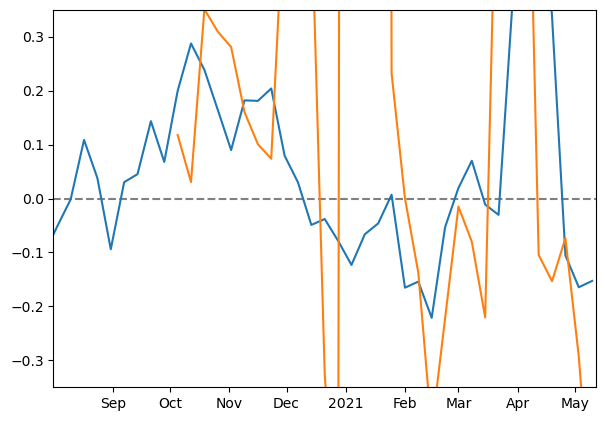

In [406]:
fi = tt['fips'].unique()[1]

df_txg_i = tt.loc[tt['fips']==fi].copy()
df_txg_i['new_cases'] = df_txg_i[['new_cases']].ffill().add(df_txg_i[['new_cases']].bfill()).div(2)['new_cases']
df_txg_i['new_cases_school'] = df_txg_i[['new_cases_student','new_staff_cases']].sum(axis=1)
df_txg_i['new_cases_school'] = df_txg_i['new_cases_school'].rolling(window=2).mean()
df_txg_i['frac_infection_oncampus'] = df_txg_i['new_infected_oncampus']/df_txg_i['new_cases_school']

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)
ax.plot([date_dict[i] for i in df_txg_i['date']],
         (df_txg_i['new_cases'].rolling(window=3).mean().pct_change()).rolling(window=3).mean())

ax.plot([date_dict[i] for i in df_txg_i['date']],
        df_txg_i['new_cases_school'].pct_change().rolling(window=3).mean())
ax.set_xticks([date_dict[i] for i in dates_tt])
ax.set_xticklabels(dates_ll)
ax.hlines(0, date_dict['2020-08-01'],date_dict[today],color='.5',ls='--')
ax.set_ylim(-0.35, 0.35)
ax.set_xlim(date_dict['2020-08-01'],date_dict[today])

plt.show()

<AxesSubplot:>

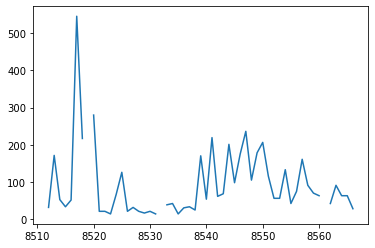

In [347]:
df_txg_i['new_cases'].plot()#.dropna().rolling(window=4).mean().plot()

In [308]:
tmp_df.sort_values('new_cases_adj',ascending=False).head(20)

,fips,state,name,date,new_cases_adj,new_cases
46898,48201,Texas,"Harris, Texas, US",2021-01-29,2763.0,2763.0
46876,48201,Texas,"Harris, Texas, US",2021-01-07,2758.0,2758.0
46879,48201,Texas,"Harris, Texas, US",2021-01-10,2752.0,2752.0
46903,48201,Texas,"Harris, Texas, US",2021-02-03,2664.0,2664.0
46859,48201,Texas,"Harris, Texas, US",2020-12-21,2595.0,2595.0
26666,48113,Texas,"Dallas, Texas, US",2021-01-07,2590.0,2590.0
26651,48113,Texas,"Dallas, Texas, US",2020-12-23,2512.0,2512.0
46889,48201,Texas,"Harris, Texas, US",2021-01-20,2496.0,2496.0
46872,48201,Texas,"Harris, Texas, US",2021-01-03,2492.0,2492.0
26644,48113,Texas,"Dallas, Texas, US",2020-12-16,2438.0,2438.0


<AxesSubplot:>

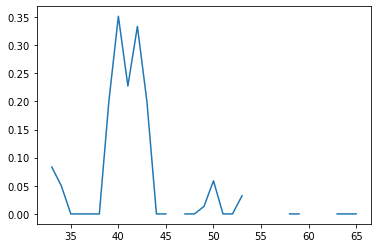

In [193]:

# (df_tx_i['new_infected_oncampus']/df_tx_i[['new_infected_oncampus','new_infected_offcampus','new_infected_unknown']].sum(axis=1)).plot()

<AxesSubplot:>

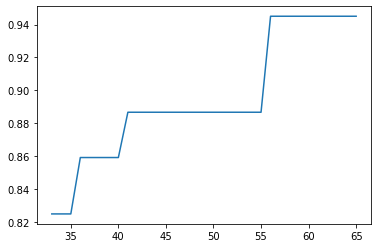

In [189]:
(df_tx_i['district_enrollment_est_oncampus']/df_tx_i['district_enrollment_total']).plot()

In [141]:
tx_df

,date,district_lea,district_enrollment_total,district_enrollment_est_oncampus,total_cases_student,total_staff_cases,total_infected_oncampus,total_infected_offcampus,total_infected_unknown,new_cases_student,new_staff_cases,new_infected_oncampus,new_infected_offcampus,new_infected_unknown,county_fips,fips
0,2020-09-14,1902,NaN,NaN,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,48001,48001
1,2020-09-21,1902,NaN,NaN,8.0,3.0,0.0,8.0,3.0,6.0,3.0,0.0,7.0,2.0,48001,48001
2,2020-09-28,1902,NaN,NaN,11.0,3.0,0.0,10.0,4.0,3.0,0.0,0.0,2.0,1.0,48001,48001
3,2020-10-05,1902,544,415,11.0,3.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,48001,48001
4,2020-10-12,1902,544,415,13.0,3.0,0.0,10.0,6.0,2.0,0.0,0.0,0.0,2.0,48001,48001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40083,2021-03-29,254902,525,0,0.0,13.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,48254,48254
40084,2021-04-05,254902,525,0,0.0,13.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,48254,48254
40085,2021-04-12,254902,525,0,0.0,13.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,48254,48254
40086,2021-04-19,254902,525,0,0.0,13.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,48254,48254


In [59]:
district_df1.loc[district_df1.district_lea==dl].columns

Index(['district_name', 'date', 'district_lea', 'district_enrollment',
       'district_enrollment_est', 'new_cases_student', 'new_staff_cases',
       'new_infected_oncampus', 'new_infected_offcampus',
       'new_infected_unknown'],
      dtype='object')

In [54]:
dlf

,date,district_lea,campus_enrollment_total,campus_enrollment_est_oncampus,total_cases_student,total_staff_cases,total_infected_oncampus,total_infected_offcampus,total_infected_unknown
0,2020-11-16,1902,535.0,489.0,26,17.0,6,21,16
1,2020-11-23,1902,535.0,489.0,28,18.0,7,21,18
2,2020-11-30,1902,535.0,489.0,29,18.0,7,22,18
3,2020-12-07,1902,535.0,489.0,29,18.0,7,22,18
4,2020-12-14,1902,535.0,489.0,29,18.0,7,22,18
5,2020-12-21,1902,535.0,489.0,29,18.0,7,22,18
6,2020-12-28,1902,535.0,489.0,29,18.0,7,22,18
7,2021-01-04,1902,535.0,489.0,32,21.0,7,28,18
8,2021-01-11,1902,535.0,489.0,32,21.0,7,28,18
9,2021-01-18,1902,535.0,489.0,34,21.0,7,29,19


In [ ]:
districts_df_prev = districts_df.copy()

In [41]:
district_df2 = campus_df.groupby(['district_name','date','district_lea']).agg(
    {'district_enrollment_oct30':np.nansum,
     'district_enrollment_oct30_est':np.nansum,
     'new_cases_student':np.nansum, 'new_staff_cases':np.nansum,
     'new_infected_oncampus':np.nansum, 'new_infected_offcampus':np.nansum,
     'new_infected_unknown':np.nansum}).reset_index()
district_df2 = district_df2.rename(columns={'district_enrollment_oct30':'district_enrollment',
                             'district_enrollment_oct30_est':'district_enrollment_est'})

district_df1 = districts_df_prev[['district_name', 'date', 'district_lea', 
              'district_enrollment_firstweek', 'district_enrollment_firstweek_est',
              'new_cases_student', 'new_staff_cases', 'new_infected_oncampus',
       'new_infected_offcampus', 'new_infected_unknown']]

district_df1 = district_df1.rename(columns={'district_enrollment_firstweek':'district_enrollment',
                             'district_enrollment_firstweek_est':'district_enrollment_est'})

district_df = pd.concat([district_df1,district_df2]).sort_values(['district_name',
                                                  'date']).reset_index().iloc[:,1:]

In [42]:
district_df.loc[district_df['district_lea']==7906]

,district_name,date,district_lea,district_enrollment,district_enrollment_est,new_cases_student,new_staff_cases,new_infected_oncampus,new_infected_offcampus,new_infected_unknown
28142,POTEET ISD,2020-09-14,7906,532,172,0.0,NaN,NaN,NaN,NaN
28143,POTEET ISD,2020-09-21,7906,532,172,0.0,NaN,NaN,NaN,NaN
28144,POTEET ISD,2020-09-28,7906,532,172,0.0,NaN,NaN,NaN,NaN
28145,POTEET ISD,2020-10-05,7906,1590,570,0.0,NaN,NaN,NaN,NaN
28146,POTEET ISD,2020-10-12,7906,1590,570,0.0,NaN,NaN,NaN,NaN
28147,POTEET ISD,2020-10-19,7906,1590,570,0.0,NaN,NaN,NaN,NaN
28148,POTEET ISD,2020-10-26,7906,1590,570,0.0,NaN,NaN,NaN,NaN
28149,POTEET ISD,2020-11-02,7906,1590,570,0.0,NaN,NaN,NaN,NaN
28150,POTEET ISD,2020-11-09,7906,1603,1022,0.0,NaN,NaN,NaN,NaN
28151,POTEET ISD,2020-11-16,7906,8015,5110,0.0,0,0,0,0


In [ ]:
districts_df_g = district_df.groupby('date').agg(
                        {'district_enrollment':np.nansum,
                         'district_enrollment_est':np.nansum,
                         'new_cases_student':np.nansum, 'new_staff_cases':np.nansum,
                         'new_infected_oncampus':np.nansum, 'new_infected_offcampus':np.nansum,
                         'new_infected_unknown':np.nansum}).reset_index()

districts_df_g = districts_df_g.merge(DATE_DF[['date','week']], how='left', on='date')

ll_texas_g = ll.loc[ll['state']=='Texas'].groupby(['week']).agg({'new_cases':'sum',
                                     'new_deaths':'sum', 'population':'mean'}).reset_index()
ll_texas_g = ll_texas_g.rename(columns={'new_cases':'new_cases_state',
                                        'new_deaths':'new_deaths_state',
                                        'population':'population_state'})

districts_df_g = districts_df_g.merge(ll_texas_g, how='left', on='week')
state_df_g = state_df.merge(ll_texas_g, how='left', on='week')

In [ ]:
lw = 3
fig, ax = plt.subplots(1,2,figsize=(11,4.5),dpi=200)
wid = 2
labs_tx = ['K12 — on-campus infection','K12 — off-campus infection',
           'K12 — unknown infection','statewide case counts']
cols = ['firebrick','lightcoral','.6','.2']
for ci, col in enumerate(['new_infected_oncampus','new_infected_offcampus',
                          'new_infected_unknown','new_cases_state']):
    xvals_i = [date_dict[i] for i in districts_df_g['date'].values]
    yvals_i = districts_df_g[col].rolling(window=wid).mean().values
    ax[0].plot(xvals_i, yvals_i/np.nansum(yvals_i), label=labs_tx[ci], lw=lw, color=cols[ci],
            path_effects=[path_effects.Stroke(linewidth=lw*1.5, foreground='w'),
                          path_effects.Normal()])
    if ci < 3:
        yvals_i = districts_df_g[col].rolling(window=wid).mean().values
        ax[1].plot(xvals_i, yvals_i, label=labs_tx[ci], lw=lw, color=cols[ci],
                path_effects=[path_effects.Stroke(linewidth=lw*1.5, foreground='w'),
                              path_effects.Normal()])

ax[0].set_ylim(-0.001)
ax[1].set_ylim(-10, 5100)
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
tlabs = ['Percent of total cases '+\
              '(%s %s – %s %s)'%(month_dict[districts_df_g['date'].min()[5:7]],
                                 districts_df_g['date'].min()[8:],
                                 month_dict[districts_df_g['date'].max()[5:7]],
                                 districts_df_g['date'].max()[8:]),
        'Weekly new cases reported '+\
              '(%s %s – %s %s)'%(month_dict[districts_df_g['date'].min()[5:7]],
                                 districts_df_g['date'].min()[8:],
                                 month_dict[districts_df_g['date'].max()[5:7]],
                                 districts_df_g['date'].max()[8:]),]

for ai,a in enumerate(fig.axes):
    a.set_xticks([date_dict[i] for i in dates_tt])
    a.set_xticklabels(dates_ll)
    l = a.legend(ncol=1, framealpha=0)
    for text in l.get_texts():
        text.set_color('.4')
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='w'),
                               path_effects.Normal()])

    a.tick_params(labelcolor='.3', color='.3')
    a.grid(linewidth=1.25,color='.75',alpha=0.25)
    a.set_title('Texas Public Schools COVID-19 Data\n'+tlabs[ai], x=1,color='.3',ha='right')
    a.set_xlim(date_dict[districts_df_g['date'].min()]+5,
                date_dict[districts_df_g['date'].max()]+2)

ax[1].text(0.99,-0.15,'source: Texas Department of Health and Human Services\n'+\
        'dshs.texas.gov/coronavirus/schools/texas-education-agency/',
        color='.5',fontsize='small', va='top', ha='right', transform=ax[1].transAxes)

plt.savefig('../figs/pngs/texas_k12_compare.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/texas_k12_compare.pdf',bbox_inches='tight')
plt.show()

In [ ]:
wid = 2
lw = 3
fig, ax = plt.subplots(1,2,figsize=(11,4.5),dpi=200)

labs_tx = ['students','employees','statewide']
cols = ['steelblue','darksalmon','.2']
for ci, col in enumerate(['new_cases_students','new_cases_employee','new_cases_state']):
    xvals_i = [date_dict[i] for i in state_df_g['date'].values]
    yvals_i = state_df_g[col].rolling(window=wid).mean().values
    ax[0].plot(xvals_i, yvals_i/np.nansum(yvals_i), label=labs_tx[ci], lw=lw, color=cols[ci],
            path_effects=[path_effects.Stroke(linewidth=lw*1.5, foreground='w'),
                          path_effects.Normal()])
    if ci < 2:
        yvals_i = state_df_g[col].rolling(window=wid).mean().values
        ax[1].plot(xvals_i, yvals_i, label=labs_tx[ci], lw=lw, color=cols[ci],
                path_effects=[path_effects.Stroke(linewidth=lw*1.5, foreground='w'),
                              path_effects.Normal()])



ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=0))
tlabs = ['Percent of total cases '+\
              '(%s %s – %s %s)'%(month_dict[districts_df_g['date'].min()[5:7]],
                                 districts_df_g['date'].min()[8:],
                                 month_dict[districts_df_g['date'].max()[5:7]],
                                 districts_df_g['date'].max()[8:]),
        'Weekly new cases reported '+\
              '(%s %s – %s %s)'%(month_dict[districts_df_g['date'].min()[5:7]],
                                 districts_df_g['date'].min()[8:],
                                 month_dict[districts_df_g['date'].max()[5:7]],
                                 districts_df_g['date'].max()[8:]),]

ax[0].set_ylim(-0.001)
ylims0 = ax[0].get_ylim()
ax[0].vlines(date_dict['2021-03-03'], -10, 3900, linestyle='--',color='.4')
ax[0].set_ylim(ylims0[0],ylims0[1])
ax[1].vlines(date_dict['2021-03-03'], -10, 11000, linestyle='--',color='.4',
             label='Mar. 3: teachers\neligible for vaccine')
ax[1].set_ylim(-10, 11000)


for ai,a in enumerate(fig.axes):
    a.set_xticks([date_dict[i] for i in dates_tt])
    a.set_xticklabels(dates_ll)
    l = a.legend(ncol=1, framealpha=0)
    for text in l.get_texts():
        text.set_color('.4')
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='w'),
                               path_effects.Normal()])

    a.tick_params(labelcolor='.3', color='.3')
    a.grid(linewidth=1.25,color='.75',alpha=0.25)
    a.set_title('Texas Public Schools COVID-19 Data\n'+tlabs[ai], x=1,color='.3',ha='right')
    a.set_xlim(date_dict[state_df_g['date'].min()]+5,
                date_dict[state_df_g['date'].max()]+2)

ax[1].text(0.99,-0.15,'source: Texas Department of Health and Human Services\n'+\
        'dshs.texas.gov/coronavirus/schools/texas-education-agency/',
        color='.5',fontsize='small', va='top', ha='right', transform=ax[1].transAxes)


plt.savefig('../figs/pngs/texas_k12_studentstaff.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/texas_k12_studentstaff.pdf',bbox_inches='tight')
plt.show()